In [69]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read in all datasets
owner_dataset = pd.read_csv('data/owner_dataset.csv')
race_ethnicity_dataset = pd.read_csv('data/race-ethnicity-dataset.csv')
states_dataset = pd.read_csv('data/states_dataset.csv')
summary_dataset = pd.read_csv('data/summary_dataset.csv')
tech_dataset = pd.read_csv('data/tech_dataset.csv')

# Race Visualizations

/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/2653048718.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928/2653048718.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
/var/folders/23/5p0ycg913qq12vh3l31n93zc0000gn/T/ipykernel_32928

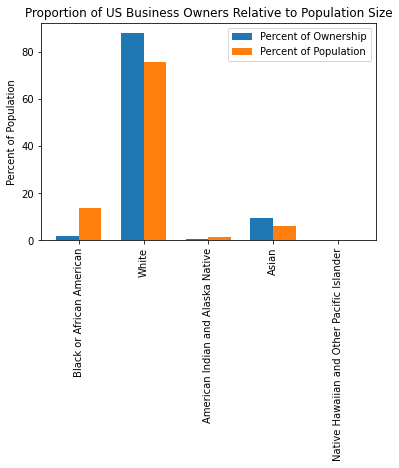

In [91]:
# Topic 1: Business Ownership

# From Census API

# Get only the wanted part of data
re_only_data = owner_dataset.copy()
re_only_data = re_only_data[re_only_data['Industry'] == 'Total for all sectors']
re_only_data = re_only_data[re_only_data['OwnerEthnicity'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnerVetStatus'] == 'All owners of respondent firms']
re_only_data = re_only_data[re_only_data['OwnedSince'] == 'Total reporting']
re_only_data = re_only_data[re_only_data['Year'] == 2018]
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Minority']
re_only_data = re_only_data[re_only_data['OwnerRace'] != 'Nonminority']

# Condense working dataset
re_only_data = re_only_data[['OwnerRace', 'OwnerCt']]

# Gives three values so take the first (b/c it is the total of the other two)
re_only_data = re_only_data[0::3]

# From Census table

# Get only wanted part of data
re_only_data_dem = race_ethnicity_dataset.copy()

# Remove unwanted rows
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'Two or More Races']
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'Hispanic or Latino']
re_only_data_dem = re_only_data_dem[re_only_data_dem['RaceOrEthnicGroup'] != 'White alone, not Hispanic or Latino']

# Get tags to match up
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'White alone'] = 'White'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Black or African American alone'] = 'Black or African American'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'American Indian and Alaska Native alone'] = 'American Indian and Alaska Native'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Asian alone'] = 'Asian'
re_only_data_dem['RaceOrEthnicGroup'][re_only_data_dem['RaceOrEthnicGroup'] == 'Native Hawaiian and Other Pacific Islander alone'] = 'Native Hawaiian and Other Pacific Islander'

# Rename to give consistent header to merger on
re_only_data_dem = re_only_data_dem.rename(columns={'RaceOrEthnicGroup': 'OwnerRace'})

# Merge data together
re_only = re_only_data.merge(re_only_data_dem, how='inner', on='OwnerRace')
re_only = re_only.rename(columns={'Value': 'PopPerc'})

# Get percent ownership
total_owners = re_only['OwnerCt'].sum()
re_only['OwnerPerc'] = re_only['OwnerCt'] / total_owners * 100

# Get owner augmentation
re_only['OwnerAugmentation'] = re_only['OwnerPerc'] / re_only['PopPerc']

# Create two graphics: (1) comparison of ownership to population percentage; and (2) ownership augmentation
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p1 = ax.bar(labels - width/2, re_only['OwnerPerc'], width, label='Percent of Ownership')
p2 = ax.bar(labels + width/2, re_only['PopPerc'], width, label='Percent of Population')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('Proportion of US Business Owners by Race, Relative to Population Size')
ax.set_ylabel('Percent of Population')
ax.legend()


Text(0, 0.5, 'Ownership Augmentation')

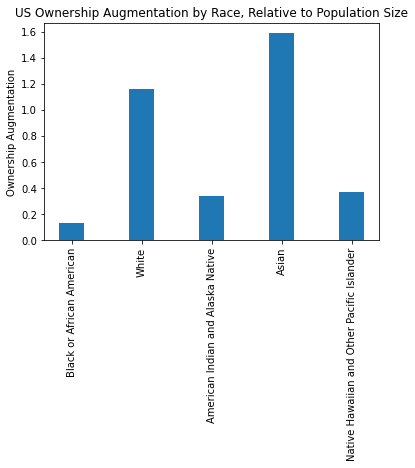

In [97]:
width = 0.35
fig, ax = plt.subplots()
labels = np.arange(len(re_only['OwnerRace']))
p1 = ax.bar(labels, re_only['OwnerAugmentation'], width, label='Percent of Ownership')
ax.set_xticks(labels, labels=(list(re_only['OwnerRace'])), rotation=90)
ax.set_title('US Ownership Augmentation by Race, Relative to Population Size')
ax.set_ylabel('Ownership Augmentation')